In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm, skew, kurtosis
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import os
print(os.listdir('./house'))

['test.csv.gz', 'sample_submission.csv.gz', 'test.csv', 'data_description.txt', 'train.csv', 'train.csv.gz', 'sample_submission.csv']


In [78]:
df_train = pd.read_csv('./house/train.csv')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [79]:
df_train.head(20)
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [80]:
#check if there any zero in minimal of the price
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

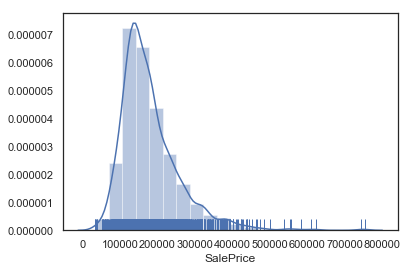

In [81]:
#https://seaborn.pydata.org/tutorial/distributions.html#plotting-univariate-distributions
sns.distplot(df_train['SalePrice'], bins=20, rug=True);

In [82]:
#Skew = ambience distributions data (0=evenly distributed)
#Kurt = to check the outlier data (3=standart value)
print("Skewness: %f" %df_train['SalePrice'].skew())
print("Kurtosis: %f" %df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


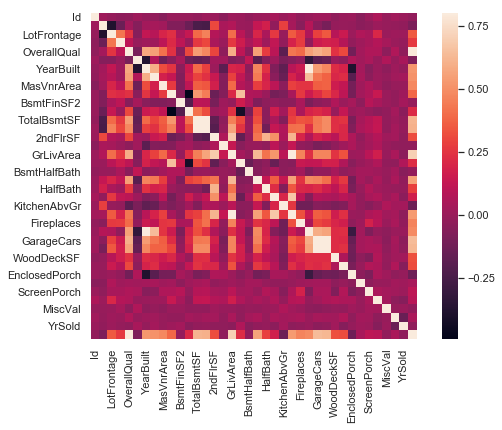

In [83]:
#Annotation Heatmap https://seaborn.pydata.org/examples/heatmap_annotation.html

Heatmap_Annotation = df_train.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(Heatmap_Annotation, 
            vmax=.8, square=True)

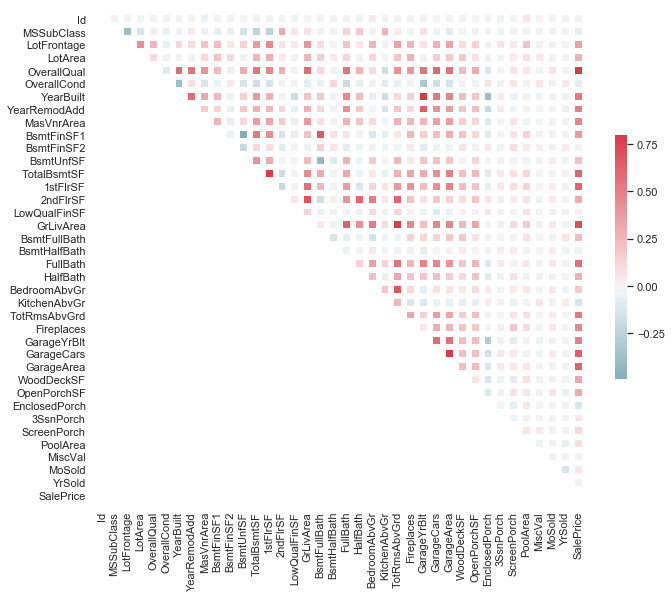

In [84]:
#Diagonal Correlation https://seaborn.pydata.org/examples/many_pairwise_correlations.html

sns.set(style='white')
Diagonal_Corr = df_train.corr()
mask = np.zeros_like(Diagonal_Corr, dtype=np.bool)
mask[np.tril_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(Diagonal_Corr, mask=mask, cmap=cmap,
           vmax=.8, center=0,square=True,
           linewidths=5, cbar_kws={"shrink":.5})

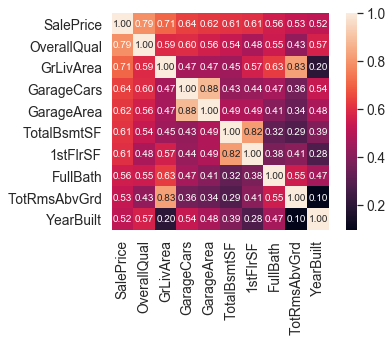

In [85]:
#SalePrice Correlation Matrix
k=10
sns.set(font_scale=1.25)
corrmat=df_train.corr()
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.heatmap(cm, annot=True, square=True,
           fmt='.2f', annot_kws={'size':10},
           yticklabels=cols.values,
           xticklabels=cols.values)



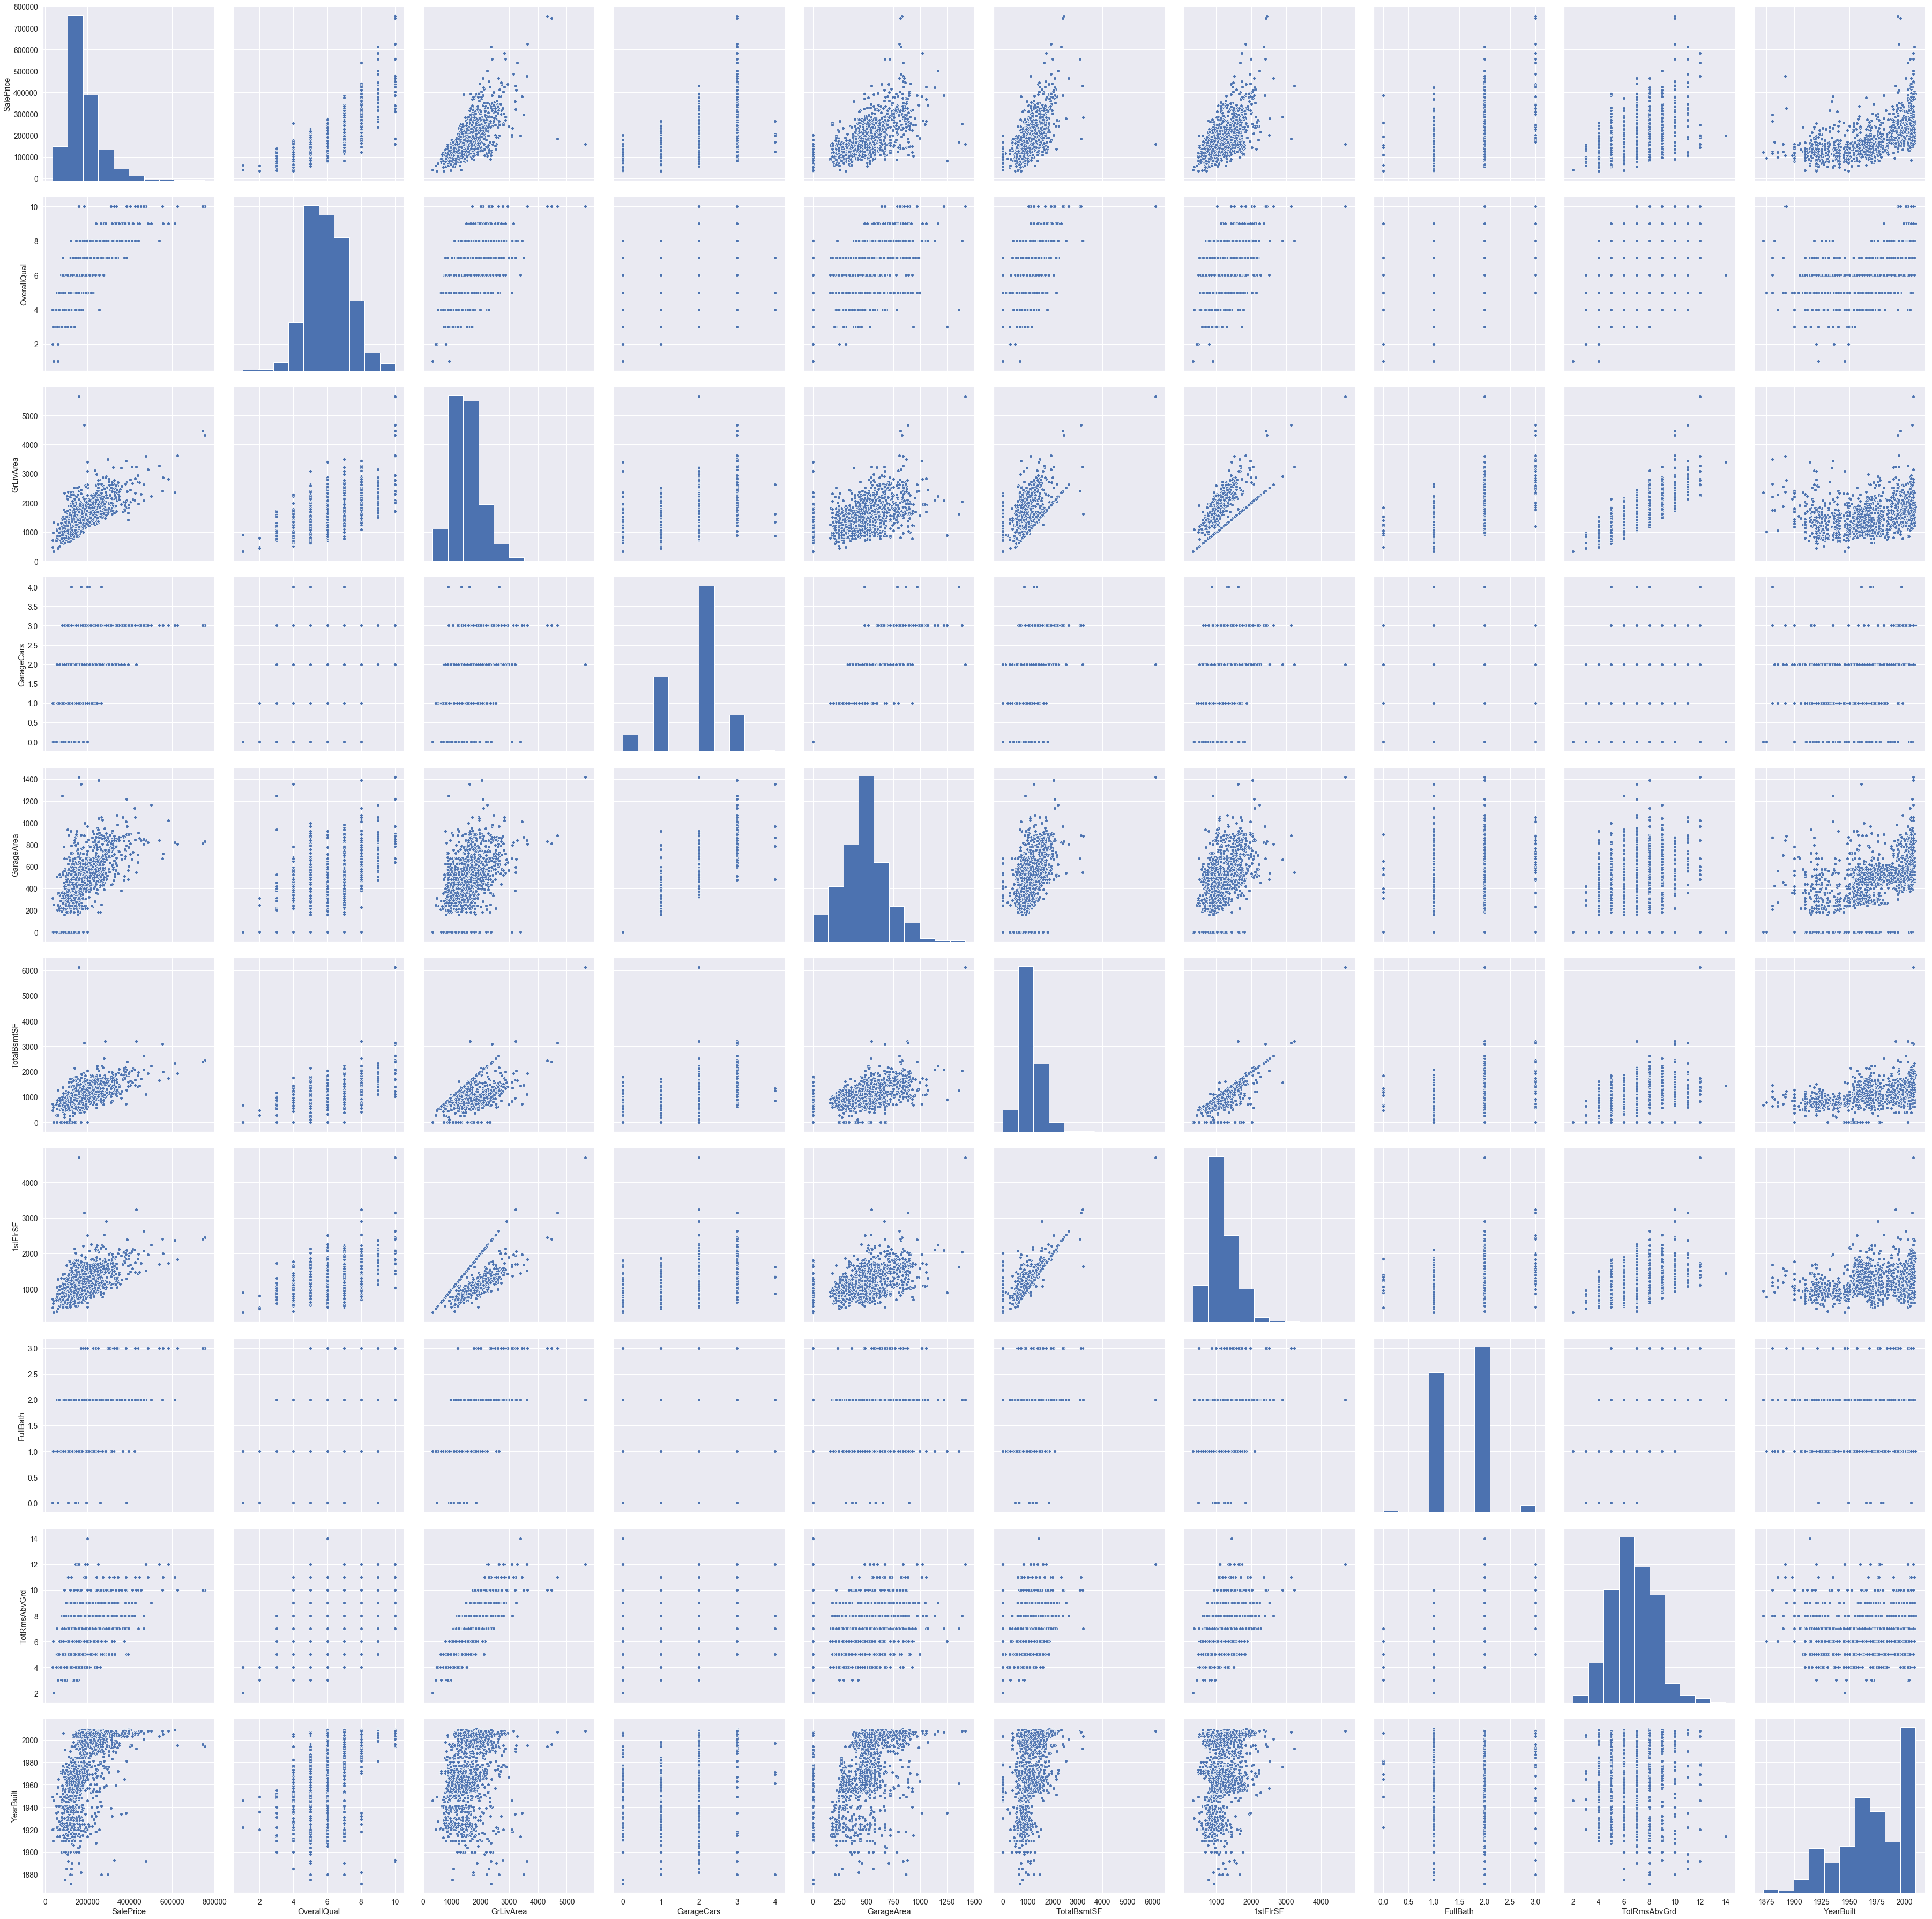

In [86]:
#Scatterplot https://seaborn.pydata.org/tutorial/regression.html
cols = ['SalePrice', 'OverallQual','GrLivArea',
       'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd',
       'YearBuilt']
sns.pairplot(df_train[cols], size =5)

In [87]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = ((df_train.isnull().sum()/df_train.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageCond,81,5.547945
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


Text(0.5,1,'Percent missing data by feature')

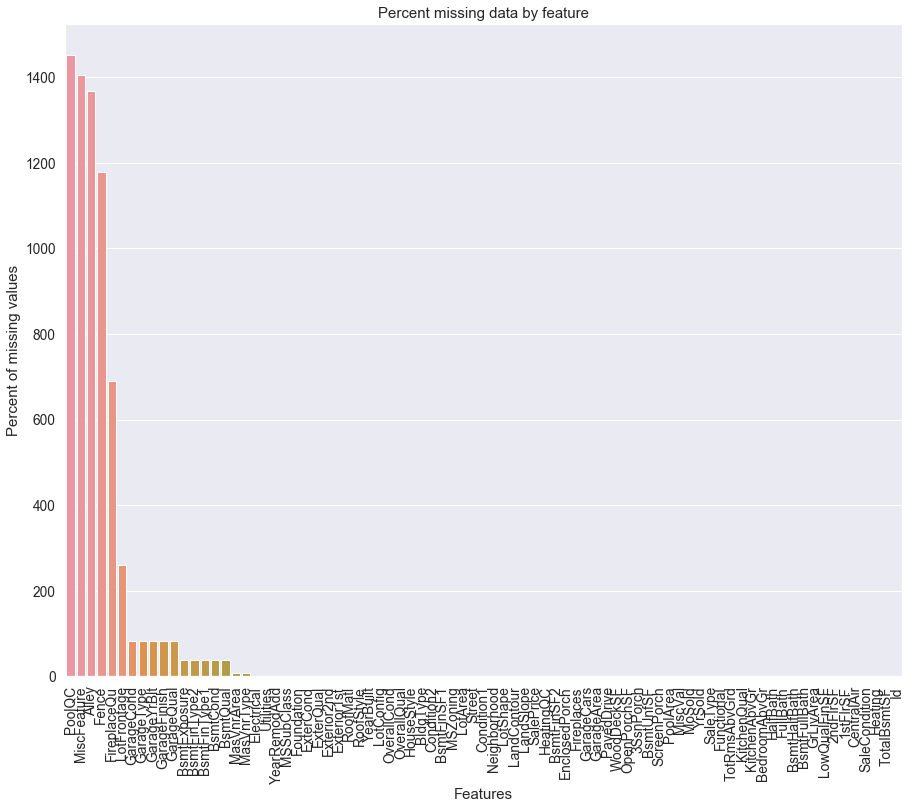

In [88]:
f, ax = plt.subplots(figsize=(15,12))
plt.xticks(rotation='90')
sns.barplot(x=total.index, y=total)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values',fontsize=15)
plt.title('Percent missing data by feature',fontsize=15)

In [89]:
#drop columns/keys that have more than 50% of null values
df_train = df_train.drop((missing_data[missing_data['Percent'] > 50 ]).index,1)
df_train.isnull().sum().sort_values(ascending=False) #check

FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrType         8
MasVnrArea         8
Electrical         1
RoofMatl           0
RoofStyle          0
SalePrice          0
Exterior1st        0
Exterior2nd        0
YearBuilt          0
ExterQual          0
ExterCond          0
Foundation         0
YearRemodAdd       0
BldgType           0
OverallCond        0
OverallQual        0
HouseStyle         0
Condition2         0
                ... 
GarageArea         0
PavedDrive         0
WoodDeckSF         0
OpenPorchSF        0
3SsnPorch          0
BsmtUnfSF          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SaleType           0
Functional         0
TotRmsAbvGrd       0
KitchenQual        0
KitchenAbvGr       0
BedroomAbvGr 

In [90]:
#FireplaceQu : data description says Null means "no fireplace"
df_train['FireplaceQu'] = df_train['FireplaceQu'].fillna('None')

In [91]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
df_train["LotFrontage"] = df_train.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [92]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 
            'BsmtFinType1', 'BsmtFinType2',
            'GarageType', 'GarageFinish', 'GarageQual', 
            'GarageCond'):
    df_train[col] = df_train[col].fillna('None')

In [93]:
#GarageYrBlt replacing missing data with 0
df_train['GarageYrBlt'] = df_train['GarageYrBlt'].fillna(0)

In [94]:
df_train["MasVnrType"] = df_train["MasVnrType"].fillna("None")
df_train["MasVnrArea"] = df_train["MasVnrArea"].fillna(0)

In [95]:
#Electrical : It has one NA value. 
#Since this feature has mostly 'SBrkr', we can set that for the missing value.
df_train['Electrical'] = df_train['Electrical'].fillna(df_train['Electrical'].mode()[0])

In [96]:
df_train.isnull().sum().sort_values(ascending=False) #check

SalePrice        0
ExterCond        0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
Foundation       0
TotalBsmtSF      0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
YearRemodAdd     0
YearBuilt        0
OverallCond      0
OverallQual      0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
                ..
WoodDeckSF       0
EnclosedPorch    0
HeatingQC        0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
GarageYrBlt      0
GarageType       0
FireplaceQu      0
Fireplaces       0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath

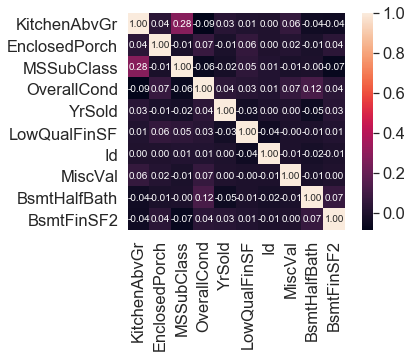

In [97]:
#SalePrice Correlation Matrix
k=10
sns.set(font_scale=1.5)
corrmat=df_train.corr()
cols = corrmat.nsmallest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.heatmap(cm, annot=True, square=True,
           fmt='.2f', annot_kws={'size':10},
           yticklabels=cols.values,
           xticklabels=cols.values)





In [98]:
#deleting uncorrelate colomns
Uncor = ['EnclosedPorch', 'OverallCond', 
        'YrSold', 'LowQualFinSF', 'Id', 
         'MiscVal', 'BsmtHalfBath', 'BsmtFinSF2']
df_train.drop(Uncor, axis=1, inplace=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 69 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1460 non-null object
MasVnrArea       1460 n

In [99]:
#More features engineering
#Transforming some numerical variables that are really
df_train['MSSubClass'] = df_train['MSSubClass'].astype(str)
df_train['MoSold'] = df_train['MoSold'].astype(str)

In [100]:
# Adding total sqfootage feature 
df_train['TotalSF'] = df_train['TotalBsmtSF'] + df_train['1stFlrSF'] + df_train['2ndFlrSF']

In [101]:
#Univariate analysis
#Detect and exclude outlier in numeric dtype
#low 0.05 and high 0.90 quantile
from pandas.api.types import is_numeric_dtype
def remove_outlier(df_train):
    low = .05
    high = .90
    quant_df = df_train.quantile([low, high])
    for name in list(df_train.columns):
        if is_numeric_dtype(df_train[name]):
            df_train = df_train[(df_train[name] > quant_df.loc[low, name]) & (df_train[name] < quant_df.loc[high, name])]
    return df_train

remove_outlier(df_train).head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,WoodDeckSF,OpenPorchSF,3SsnPorch,ScreenPorch,PoolArea,MoSold,SaleType,SaleCondition,SalePrice,TotalSF


In [102]:
#check the standardizing data
for name in list(df_train.columns):
    if is_numeric_dtype(df_train[name]):
        saleprice_scaled = StandardScaler().fit_transform(df_train[name][:,np.newaxis]);
        low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:5]
        high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-5:]
        print('outer range (low) of the distribution:',name)
        print(low_range)
        print('\nouter range (high) of the distribution:',name)
        print(high_range)

outer range (low) of the distribution: LotFrontage
[[-2.19404111]
 [-2.19404111]
 [-2.19404111]
 [-2.19404111]
 [-2.19404111]]

outer range (high) of the distribution: LotFrontage
[[ 4.6289391 ]
 [ 4.6289391 ]
 [ 4.98569623]
 [10.82759432]
 [10.82759432]]
outer range (low) of the distribution: LotArea
[[-0.92372923]
 [-0.90598993]
 [-0.90458682]
 [-0.90107905]
 [-0.9003775 ]]

outer range (high) of the distribution: LotArea
[[ 6.03779326]
 [10.48644876]
 [14.88128503]
 [15.44854173]
 [20.51827316]]
outer range (low) of the distribution: OverallQual
[[-3.6884129 ]
 [-3.6884129 ]
 [-2.96509754]
 [-2.96509754]
 [-2.96509754]]

outer range (high) of the distribution: OverallQual
[[2.82142532]
 [2.82142532]
 [2.82142532]
 [2.82142532]
 [2.82142532]]
outer range (low) of the distribution: YearBuilt
[[-3.28782363]
 [-3.1884614 ]
 [-3.02285768]
 [-3.02285768]
 [-3.02285768]]

outer range (high) of the distribution: YearBuilt
[[1.24971825]
 [1.24971825]
 [1.24971825]
 [1.24971825]
 [1.28283899]

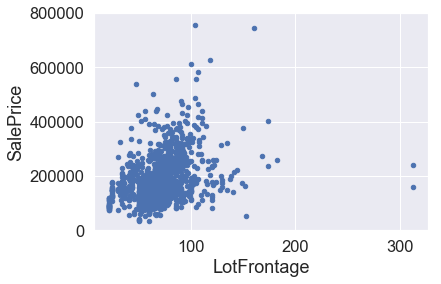

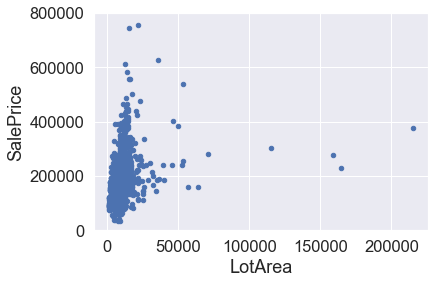

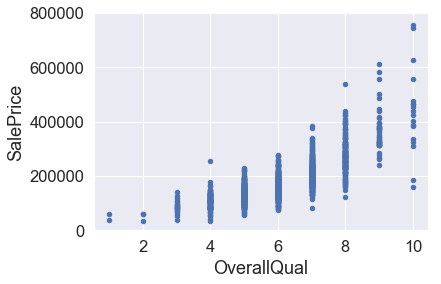

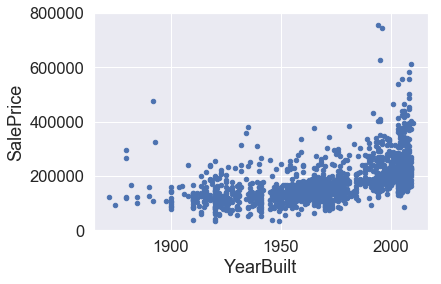

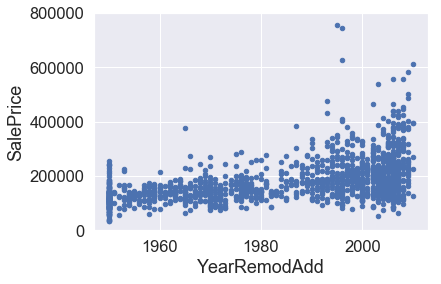

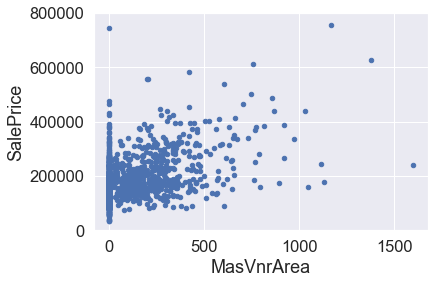

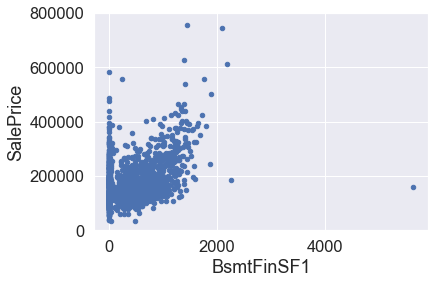

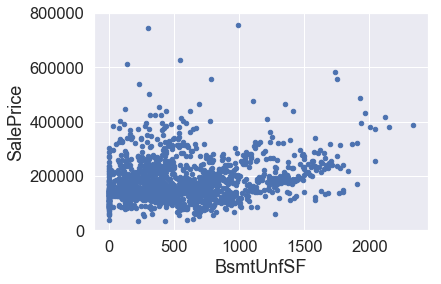

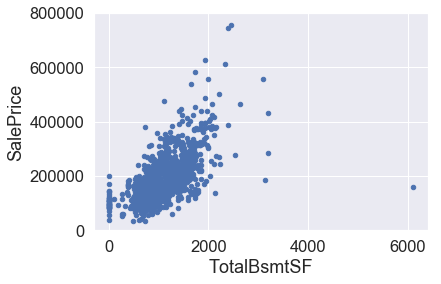

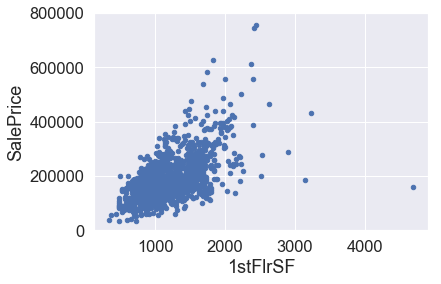

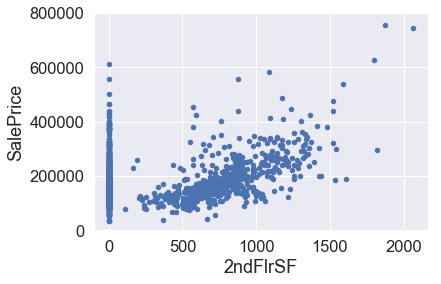

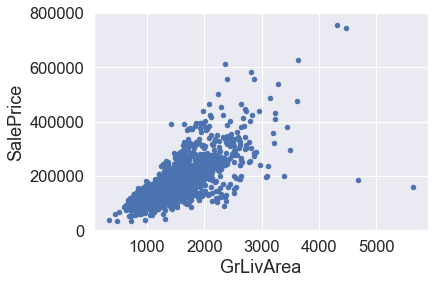

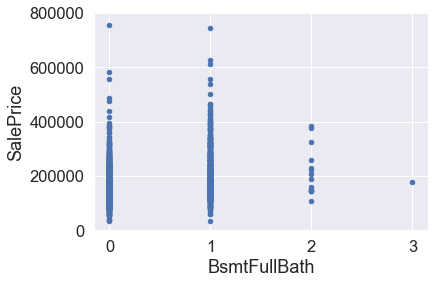

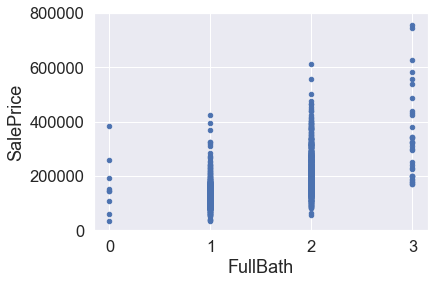

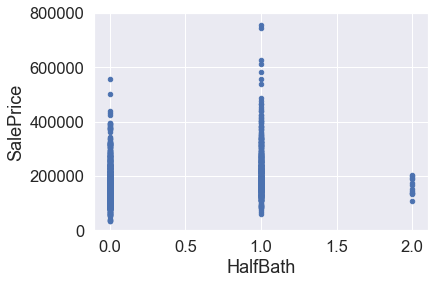

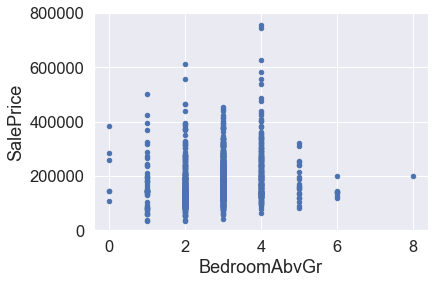

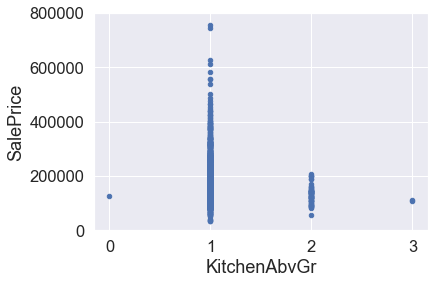

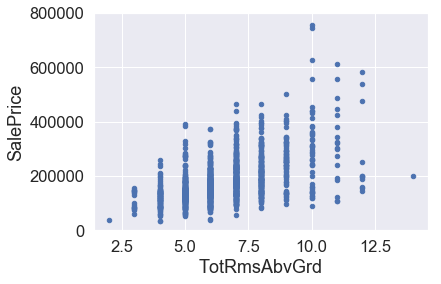

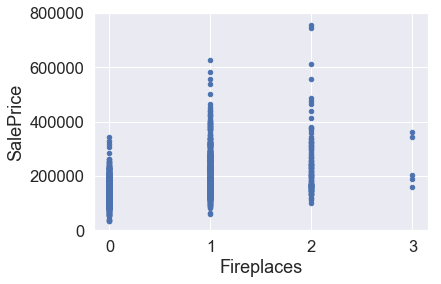

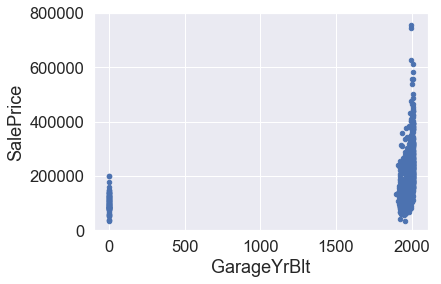

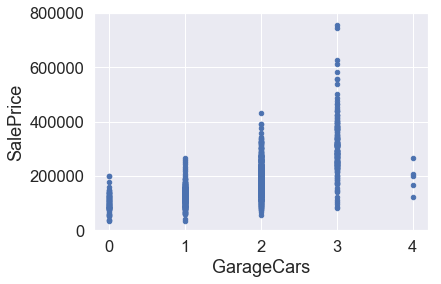

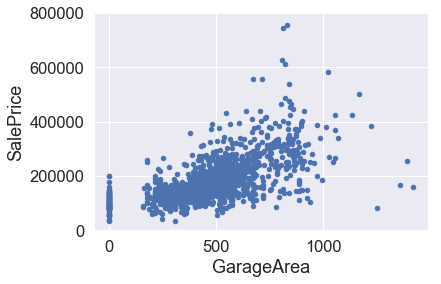

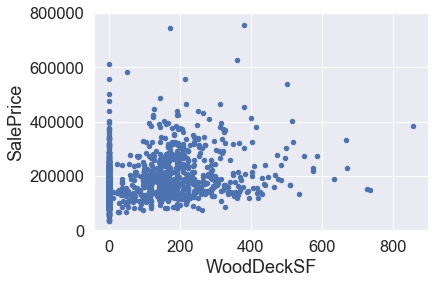

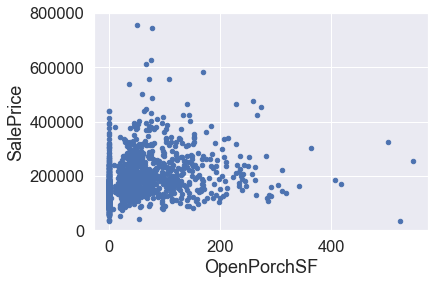

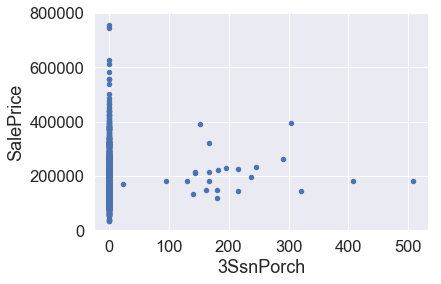

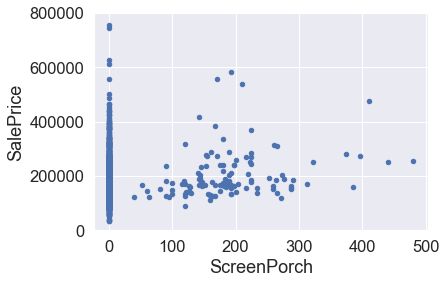

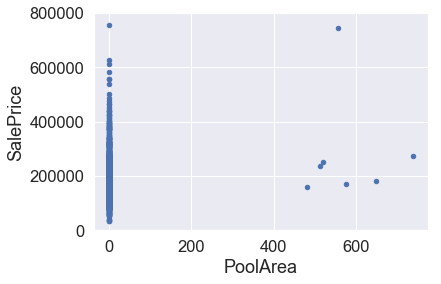

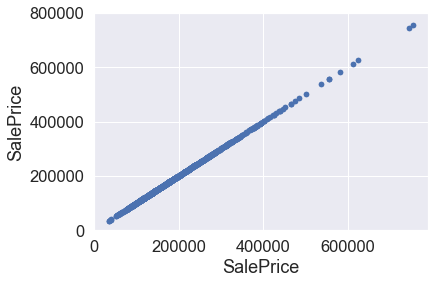

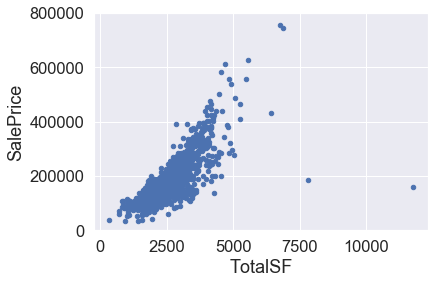

In [103]:
#Bivariate/Multivariate outlier checking with scatter plot
for name in list(df_train.columns):
    if is_numeric_dtype(df_train[name]):
        data = pd.concat([df_train['SalePrice'], df_train[name]], axis=1)
        data.plot.scatter(x=name, y='SalePrice', ylim=(0,800000))

In [104]:
#Dropping the outlier
#Only on the Feature that perform linear regression dot in the scatter plot
df_train = df_train.drop(df_train[df_train['LotFrontage'] > 300].index)
df_train = df_train.drop(df_train[df_train['LotArea'] > 60000].index)
df_train = df_train.drop(df_train[(df_train['OverallQual'] > 9) & (df_train['SalePrice'] < 200000)].index)
df_train = df_train.drop(df_train[df_train['MasVnrArea'] > 1500].index)
df_train = df_train.drop(df_train[df_train['TotalBsmtSF'] > 3000].index)
df_train = df_train.drop(df_train[df_train['1stFlrSF'] > 2500].index)
df_train = df_train.drop(df_train[df_train['BsmtFullBath'] > 2.5].index)
df_train = df_train.drop(df_train[df_train['HalfBath'] > 1.5].index)
df_train = df_train.drop(df_train[df_train['BedroomAbvGr'] > 4].index)
df_train = df_train.drop(df_train[df_train['TotRmsAbvGrd'] > 13].index)
df_train = df_train.drop(df_train[df_train['Fireplaces'] > 2.5].index)
df_train = df_train.drop(df_train[df_train['GarageCars'] > 3].index)
df_train = df_train.drop(df_train[df_train['GarageArea'] >= 1250].index)



In [105]:
#skewed features
numeric_feats = df_train.dtypes[df_train.dtypes != "object"].index
# Check the skew of all numerical features
skewed_feats = df_train[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(20)


Skew in numerical features: 



,Skew
PoolArea,17.054024
3SsnPorch,10.055695
KitchenAbvGr,5.313466
ScreenPorch,4.024712
LotArea,3.447057
MasVnrArea,2.510478
OpenPorchSF,2.203790
SalePrice,1.910269
WoodDeckSF,1.490715
GrLivArea,1.049065


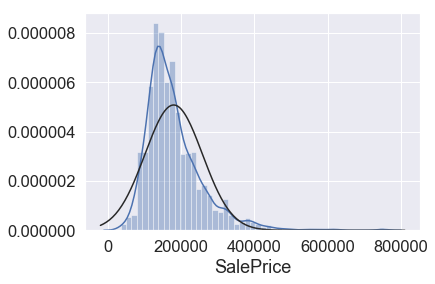

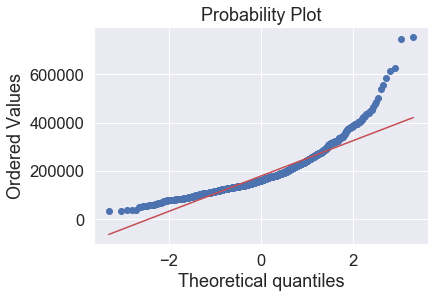

In [106]:
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

In [107]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #df_train[feat] += 1
    df_train [feat] = boxcox1p(df_train[feat], lam)
    
#df_train[skewed_features] = np.log1p(df_train[skewed_features])

There are 29 skewed numerical features to Box Cox transform


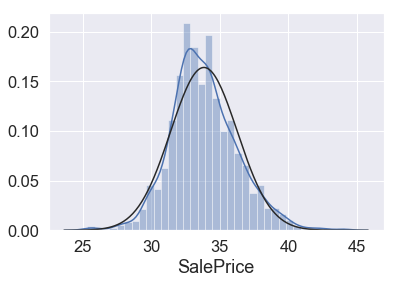

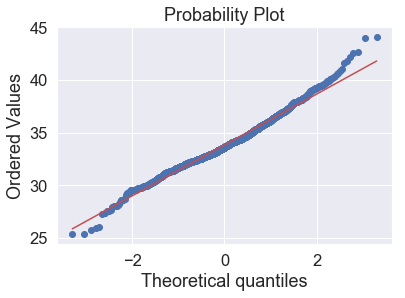

In [108]:
#check
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

In [109]:
from sklearn.preprocessing import LabelEncoder
colomns = df_train.dtypes[df_train.dtypes == "object"].index
# process columns, apply LabelEncoder to categorical features
for name in colomns:
    lbl = LabelEncoder() 
    lbl.fit(list(df_train[name].values)) 
    df_train[name] = lbl.transform(list(df_train[name].values))

# shape        
print('Shape of df_train: {}'.format(df_train.shape))

Shape of df_train: (1395, 70)


In [110]:
#Dummy categorical features
df_train = pd.get_dummies(df_train)
print(df_train.shape)
df_train.head(20) #please compare the data after engineering and before engineering

(1395, 70)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,WoodDeckSF,OpenPorchSF,3SsnPorch,ScreenPorch,PoolArea,MoSold,SaleType,SaleCondition,SalePrice,TotalSF
0,9,3,5.831328,19.212182,1,3,3,0,4,0,...,0.000000,5.714669,0.000000,0.000000,0.0,4,8,4,35.190995,14.976591
1,4,3,6.221214,19.712205,1,3,3,0,2,0,...,9.010206,0.000000,0.000000,0.000000,0.0,7,8,4,34.329249,14.923100
2,9,3,5.914940,20.347241,1,0,3,0,4,0,...,0.000000,5.053371,0.000000,0.000000,0.0,11,8,4,35.629466,15.149678
3,10,3,5.684507,19.691553,1,0,3,0,0,0,...,0.000000,4.745132,0.000000,0.000000,0.0,4,8,0,32.763482,14.857121
4,9,3,6.314735,21.325160,1,0,3,0,2,0,...,8.013884,6.314735,0.000000,0.000000,0.0,3,8,4,36.346360,15.852312
5,8,3,6.337529,21.282283,1,0,3,0,4,0,...,4.969939,4.492018,9.178051,0.000000,0.0,1,8,4,32.889081,14.421879
6,4,3,6.098626,19.907529,1,3,3,0,4,0,...,8.649311,5.591427,0.000000,0.000000,0.0,10,8,4,37.692125,15.889512
7,9,3,6.221214,20.023862,1,0,3,0,0,0,...,8.463564,8.147316,0.000000,0.000000,0.0,2,8,4,34.930482,15.702021
8,8,4,5.392276,17.989871,1,3,3,0,4,0,...,6.448232,0.000000,0.000000,0.000000,0.0,6,8,0,32.323098,15.173780
9,3,3,5.357203,18.712544,1,3,3,0,0,0,...,0.000000,1.820334,0.000000,0.000000,0.0,0,8,4,31.765210,14.287617


In [111]:
test = pd.read_csv('./house/test.csv')

In [112]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb


In [113]:
test.head(10)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [114]:
total = test.isnull().sum().sort_values(ascending=False)
percent = ((test.isnull().sum()/test.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1456,99.794380
MiscFeature,1408,96.504455
Alley,1352,92.666210
Fence,1169,80.123372
FireplaceQu,730,50.034270
LotFrontage,227,15.558602
GarageCond,78,5.346127
GarageQual,78,5.346127
GarageYrBlt,78,5.346127
GarageFinish,78,5.346127


In [115]:
#drop columns/keys that have more than 50% of null values
test = test.drop((missing_data[missing_data['Percent'] > 50 ]).index,1)
test.isnull().sum().sort_values(ascending=False) #check

LotFrontage      227
GarageCond        78
GarageQual        78
GarageYrBlt       78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtUnfSF          1
SaleType           1
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
Exterior1st        1
TotalBsmtSF        1
GarageCars         1
KitchenQual        1
GarageArea         1
HouseStyle         0
MSSubClass         0
                ... 
BldgType           0
Condition2         0
SaleCondition      0
ExterCond          0
TotRmsAbvGrd       0
YrSold             0
MoSold             0
MiscVal            0
PoolArea           0
ScreenPorch        0
3SsnPorch          0
EnclosedPorch      0
OpenPorchSF        0
WoodDeckSF         0
PavedDrive         0
Fireplaces         0
KitchenAbvGr 

In [125]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
test["LotFrontage"] = test.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [126]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 
            'BsmtFinType1', 'BsmtFinType2','Utilities',
            'SaleType','Exterior2nd','Exterior1st',
            'Functional','MSZoning','KitchenQual',
            'GarageType', 'GarageFinish', 'GarageQual', 
            'GarageCond'):
    test[col] = test[col].fillna('None')

In [127]:
test["MasVnrType"] = test["MasVnrType"].fillna("None")
test["MasVnrArea"] = test["MasVnrArea"].fillna(0)

In [130]:
for col in ('GarageYrBlt','BsmtFullBath','BsmtHalfBath','BsmtFinSF2',
            'BsmtFinSF1','GarageCars','GarageArea',
            'BsmtUnfSF','TotalBsmtSF'
           ):
    test[col] = test[col].fillna(0)
test.isnull().sum().sort_values(ascending=False) #check

SaleCondition    0
YearBuilt        0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
YearRemodAdd     0
OverallCond      0
BsmtUnfSF        0
OverallQual      0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
                ..
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
GarageYrBlt      0
Fireplaces       0
Heating          0
Functional       0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath

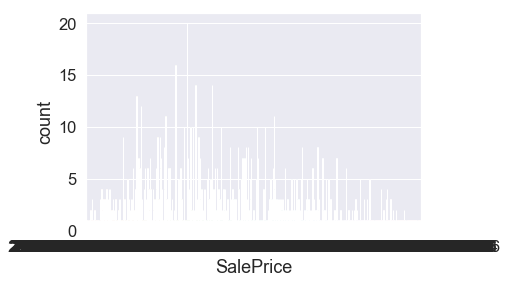

In [122]:

X_train = df_train.drop(labels=['SalePrice'], axis=1)
y_train = df_train['SalePrice']
g = sns.countplot(y_train)

In [131]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    rmse= np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [132]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [133]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [134]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [135]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [136]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [137]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.7640 (0.0380)



In [138]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.7641 (0.0381)



In [139]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.8707 (0.0303)



In [140]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.7204 (0.0345)



In [141]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.7164 (0.0389)



In [142]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)

In [143]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.7182 (0.0332)



In [144]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [145]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').